In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### Total data points

In [4]:
df.shape

(891, 12)

### Data types

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Missing data

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Visualizing the missing data

<Axes: >

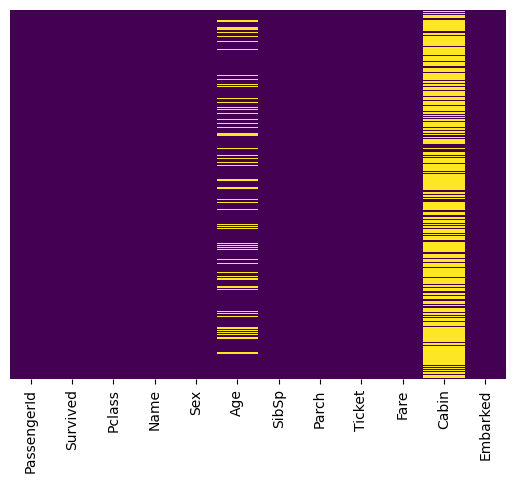

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### People counts who are survivied

<Axes: xlabel='Survived', ylabel='count'>

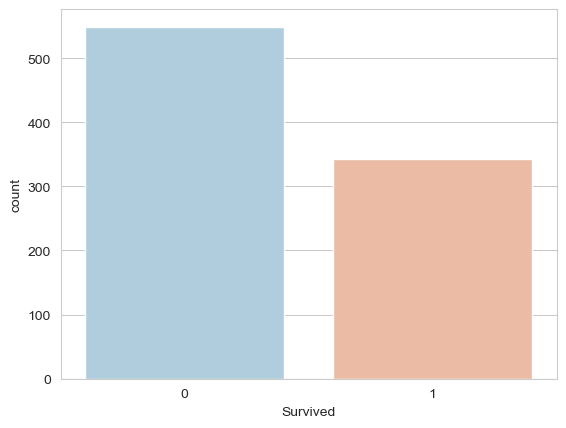

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, palette='RdBu_r')

### People counts who are survived with respect to the Sex

<Axes: xlabel='Survived', ylabel='count'>

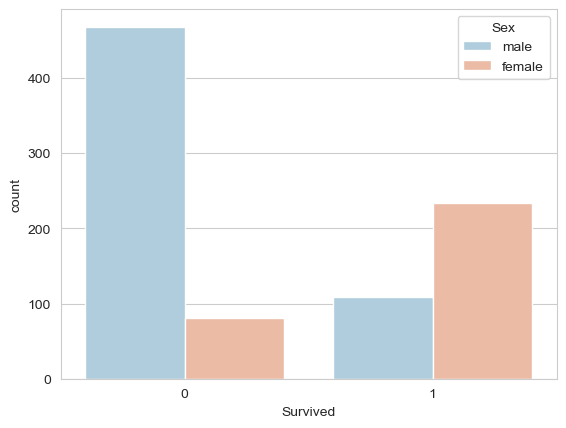

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex', palette='RdBu_r')

### People counts who are survived with respect to the Pclass

<Axes: xlabel='Survived', ylabel='count'>

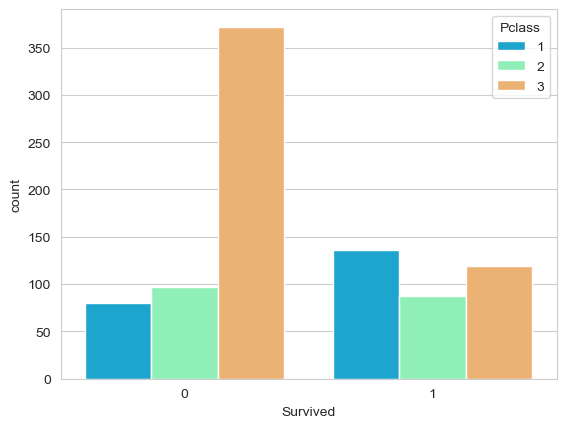

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Pclass', palette='rainbow')

### Age Distribution without null values

<Axes: xlabel='Age'>

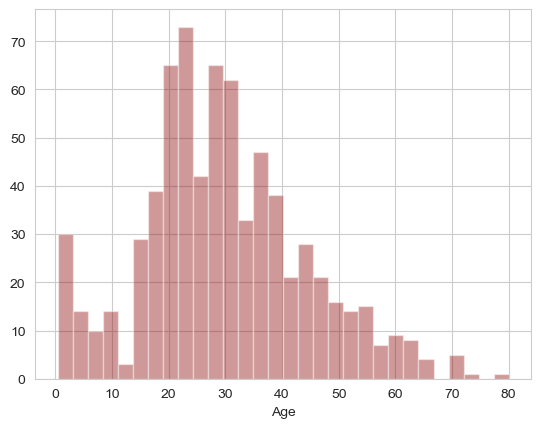

In [31]:
sns.distplot(df['Age'].dropna(), kde=False, color='darkred', bins=30)

### Age distribution

<Axes: xlabel='Age'>

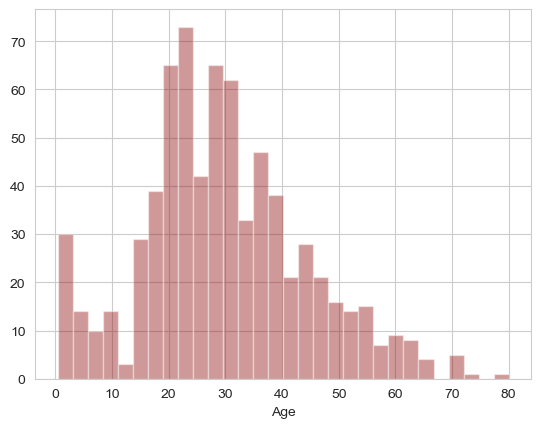

In [34]:
sns.distplot(df['Age'], kde=False, color='darkred', bins=30)

### Visualizing the missing data with boxplot

<Axes: xlabel='Pclass', ylabel='Age'>

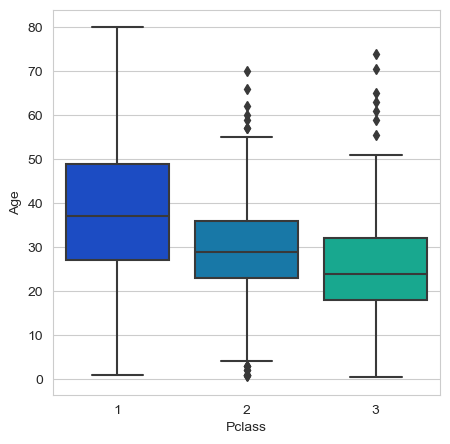

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

### Calculating mean of Age for each Pclass groups

In [54]:
pclass1 = df[df['Pclass'] == 1]
pclass1_mean = pclass1['Age'].mean()
pclass1_mean

38.233440860215055

In [56]:
pclass2 = df[df['Pclass'] == 2]
pclass2_mean = pclass2['Age'].mean()
pclass2_mean

29.87763005780347

In [55]:
pclass3 = df[df['Pclass'] == 3]
pclass3_mean = pclass3['Age'].mean()
pclass3_mean

25.14061971830986

### Function to fill null values

In [57]:
def impute_age(data):
    age = data[0]
    pclass = data[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return pclass1_mean
            
        elif pclass == 2:
            return pclass2_mean
        
        else:
            return pclass3_mean
            
    else:
        return age

In [58]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

### Result

<Axes: >

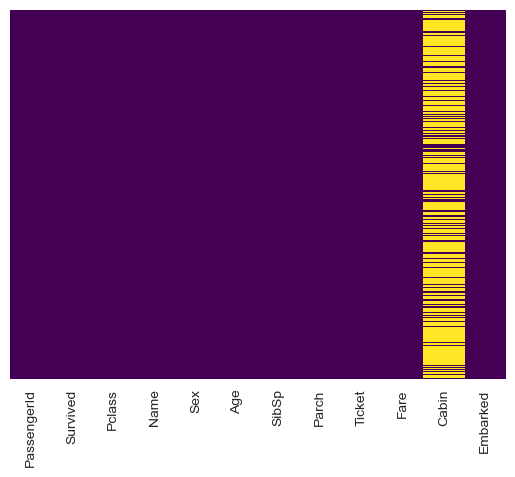

In [61]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')